In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from glob import glob
import json
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from pprint import pprint
import seaborn as sns

In [22]:
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
sns.set_palette('Paired')

In [4]:
data_dir = '../data/data_public/C'
build_dir = '../build/'
model_dir = os.path.join(build_dir, 'model')
metric_dir = os.path.join(build_dir, 'metric')
val_dir = os.path.join(build_dir, 'val')
tst_dir = os.path.join(build_dir, 'tst')
sub_dir = os.path.join(build_dir, 'sub')

info_file = os.path.join(data_dir, 'train', 'info.json')
train_feature_file = os.path.join(data_dir, 'train', 'main_train.data')
train_label_file = os.path.join(data_dir, 'train', 'main_train.solution')
test_feature_file = os.path.join(data_dir, 'test', 'main_test.data')
table_files = glob(os.path.join(data_dir, 'train', 'table_*.data'))

In [5]:
table_files

['../data/data_public/C/train/table_1.data',
 '../data/data_public/C/train/table_2.data']

In [6]:
with open(info_file, 'r') as f:
    info = json.load(f)
    
pprint(info)

{'relations': [{'key': ['c_01'],
                'table_A': 'main',
                'table_B': 'table_1',
                'type': 'many_to_one'},
               {'key': ['c_02'],
                'table_A': 'main',
                'table_B': 'table_2',
                'type': 'many_to_one'}],
 'start_time': 1550654179,
 'tables': {'main': {'c_01': 'cat',
                     'c_02': 'cat',
                     'c_1': 'cat',
                     'c_2': 'cat',
                     'c_3': 'cat',
                     'c_4': 'cat',
                     'c_5': 'cat',
                     'm_1': 'multi-cat',
                     'n_1': 'num',
                     'n_2': 'num',
                     'n_3': 'num',
                     't_01': 'time',
                     't_1': 'time'},
            'table_1': {'c_01': 'cat',
                        'c_1': 'cat',
                        'c_2': 'cat',
                        'c_3': 'cat',
                        'c_4': 'cat',
                      

In [7]:
trn_feature = pd.read_csv(train_feature_file, sep='\t', parse_dates=['t_01'],
                          date_parser=lambda x: pd.to_datetime(x, unit='ms'))
print(trn_feature.shape)
trn_feature.head()

/Users/jeong/.conda/envs/jeong/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1003286, 13)


,t_01,c_1,n_1,c_2,n_2,n_3,c_3,t_1,c_4,c_5,m_1,c_02,c_01
0,2017-12-12 16:53:59.767,68675466883330536,23.5,12035290943822969119,7.0,1.0,12472614627876446882,1.411309e+12,5584643403516971464,6027219818020456589,NaN,3055395646351516089,12035290943822969119
1,2017-12-13 06:06:06.558,17414172689620624990,1937.5,9545097029847600916,1.0,1.0,3546733086056819470,1.412214e+12,5584643403516971464,16745739996710018631,"6580202212748738322,12081440330015705663,12799...",3055395646351516089,9545097029847600916
2,2017-12-13 05:21:49.648,7677313596318798389,283.0,3642857486069628068,1.0,1.0,12111971706873116700,1.413310e+12,5584643403516971464,6027219818020456589,"15555891107502776491,6153563843004120453,13095...",3055395646351516089,3642857486069628068
3,2017-12-13 04:46:27.741,11050850235276323361,283.0,3642857486069628068,1.0,1.0,12111971706873116700,1.413310e+12,5584643403516971464,6027219818020456589,"15555891107502776491,6153563843004120453,13095...",3055395646351516089,3642857486069628068
4,2017-12-13 02:04:27.767,3534808881945716299,283.0,3642857486069628068,1.0,1.0,12111971706873116700,1.413310e+12,5584643403516971464,6027219818020456589,"15555891107502776491,6153563843004120453,13095...",3055395646351516089,3642857486069628068


In [8]:
trn_feature.t_01.min(), trn_feature.t_01.max()

(Timestamp('2017-12-12 16:00:00.504000'),
 Timestamp('2017-12-13 08:00:19.784000'))

In [11]:
trn_label = pd.read_csv(train_label_file, sep='\t')
trn = pd.concat([trn_label, trn_feature], axis=1)
trn.label.value_counts()

0    1002691
1        595
Name: label, dtype: int64

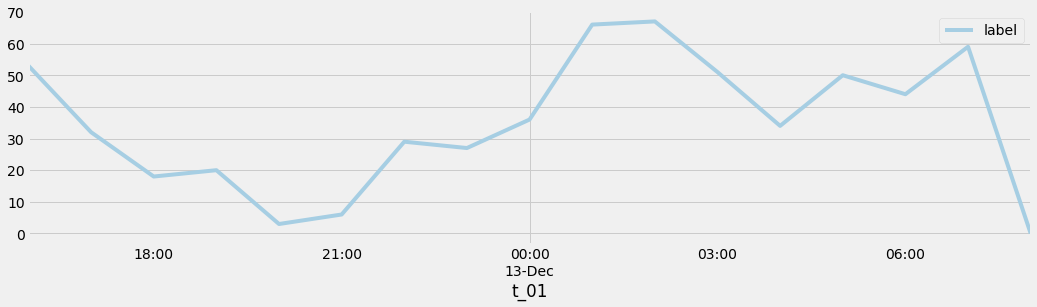

In [23]:
trn.set_index('t_01')[['label']].resample('h').sum().plot(figsize=(16, 4))

In [9]:
tst_feature = pd.read_csv(test_feature_file, sep='\t', parse_dates=['t_01'],
                          date_parser=lambda x: pd.to_datetime(x, unit='ms'))
print(tst_feature.shape)
tst_feature.head()

(981609, 13)


,t_01,c_1,n_1,c_2,n_2,n_3,c_3,t_1,c_4,c_5,m_1,c_02,c_01
0,2017-12-13 13:53:23.767,15830274432186618869,730.0,4667765872432727041,4.0,1.0,9712055990861830264,1.465056e+12,5584643403516971464,6027219818020456589,"8699576179905564834,8699576179905564834,869957...",8874030903125726337,4667765872432727041
1,2017-12-13 12:48:00.558,4232558052441353188,337.0,10184931392612762668,1.0,1.0,9712055990861830264,1.466848e+12,5584643403516971464,6027219818020456589,"646386744235755061,646386744235755061,51806179...",8874030903125726337,10184931392612762668
2,2017-12-13 10:10:22.648,4232558052441353188,337.0,10184931392612762668,1.0,1.0,9712055990861830264,1.466848e+12,5584643403516971464,6027219818020456589,"646386744235755061,646386744235755061,51806179...",8874030903125726337,10184931392612762668
3,2017-12-13 12:40:08.741,5238038937678288285,238.0,6540996432261550297,1.0,1.0,10356890165741141056,1.467370e+12,5584643403516971464,6027219818020456589,"4078306114846299113,4078306114846299113,325886...",8874030903125726337,6540996432261550297
4,2017-12-13 10:09:32.767,2219249555476167696,238.0,6540996432261550297,1.0,1.0,10356890165741141056,1.467370e+12,5584643403516971464,6027219818020456589,"4078306114846299113,4078306114846299113,325886...",8874030903125726337,6540996432261550297


In [10]:
tst_feature.t_01.min(), tst_feature.t_01.max()

(Timestamp('2017-12-13 08:00:26.501000'),
 Timestamp('2017-12-13 16:00:01.764000'))